In [1]:
import pandas as pd
import requests
from io import BytesIO
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import numpy as np
import json
import math

In [2]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
s=requests.get(url).content
confirmed = pd.read_csv(BytesIO(s))

In [3]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
s=requests.get(url).content
deaths = pd.read_csv(BytesIO(s))

In [4]:
OFFSET = 100

In [5]:
def by_country(df):
    return df.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum().sort_values([df.columns.tolist()[-1]], ascending=False)

confirmed_country = by_country(confirmed)
deaths_country = by_country(deaths)

In [6]:
# Fix 2020-03-12, see https://github.com/CSSEGISandData/COVID-19/issues/599
# Italy: 15113 confirmed cases, 1016 death and 1258 recovered
confirmed_country['3/12/20']['Italy'] = 15113
deaths_country['3/12/20']['Italy'] = 1016

#confirmed_country['3/19/20'] = np.zeros((len(confirmed_country.index),), dtype=int)
#deaths_country['3/19/20'] = np.zeros((len(confirmed_country.index),), dtype=int)

#confirmed_country['3/19/20']['Italy'] = 41035
#deaths_country['3/19/20']['Italy'] = 3405

#confirmed_country['3/19/20']['Germany'] = 15320
#deaths_country['3/19/20']['Germany'] = 44

In [7]:
infections_country = confirmed_country.sub(confirmed_country.shift(axis='columns', periods=1))

In [8]:
active_country = confirmed_country.sub(confirmed_country.shift(axis='columns', periods=14))

In [9]:
confirmed_country.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,140909,161837,188172,213372,243616,275586,308850,337072,366667,396223
Spain,0,0,0,0,0,0,0,0,0,0,...,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942
Italy,0,0,0,0,0,0,0,0,0,2,...,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586
France,0,0,2,3,3,3,4,5,5,5,...,40708,45170,52827,57749,59929,65202,90848,93773,98963,110065
Germany,0,0,0,0,0,1,4,4,4,5,...,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,82122,82198,82279,82361,82432,82511,82543,82602,82665,82718
Iran,0,0,0,0,0,0,0,0,0,0,...,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,19780,22453,25481,29865,34173,38689,42477,48436,52279,55949
Turkey,0,0,0,0,0,0,0,0,0,0,...,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109


In [10]:
#active_country = confirmed_country.sub(deaths_country).sub(recovered_country).reindex(index=confirmed_country.index)
#active_country.head(10)

In [11]:
country = 'Germany'
pd.DataFrame(confirmed_country.loc[country]).tail(30)

,Germany
3/9/20,1176
3/10/20,1457
3/11/20,1908
3/12/20,2078
3/13/20,3675
3/14/20,4585
3/15/20,5795
3/16/20,7272
3/17/20,9257
3/18/20,12327


In [12]:
pd.DataFrame(deaths_country.loc[country]).tail(10)

,Germany
3/29/20,533
3/30/20,645
3/31/20,775
4/1/20,920
4/2/20,1107
4/3/20,1275
4/4/20,1444
4/5/20,1584
4/6/20,1810
4/7/20,2016


In [13]:
pd.DataFrame(infections_country.loc[country]).tail(10)

,Germany
3/29/20,4400.0
3/30/20,4790.0
3/31/20,4923.0
4/1/20,6064.0
4/2/20,6922.0
4/3/20,6365.0
4/4/20,4933.0
4/5/20,4031.0
4/6/20,3251.0
4/7/20,4289.0


In [14]:
#pd.DataFrame(active_country.loc[country]).tail(10)

In [15]:
def relative(df, offset=OFFSET):
    rows = []
    for country, row in df.iterrows():
        day_n = 0
        data = dict()
        data['country'] = country
        for date, value in row.iteritems():
            if confirmed_country.loc[country][date] >= offset or day_n > 0:
                data[day_n] = value
                day_n += 1
        rows.append(data)
    return pd.DataFrame.from_records(rows, index='country').dropna(how='all')

In [16]:
def plottable(df, countries=['China', 'Others', 'Cruise Ship'], mode='exclude'):
    filtered = df[df.index.isin(countries)] if mode == 'include' else df[~df.index.isin(countries)]
    plot_data = filtered.head(8).T.dropna(how='all')
    return plot_data

In [17]:
def plot_linear(plot_data, what='Confirmed', offset=OFFSET):
    fig, ax = plt.subplots(figsize=(10,6), dpi=150)
    sns.lineplot(ax=ax, data=plot_data, dashes=False, markers=True, hue='country')
    plt.legend(loc='upper left')
    ax.set(xlabel=('Day N after the first %d Confirmed Cases' % offset), ylabel=('%s Cases' % what))
    return ax

In [18]:
def plot_log(plot_data, what='Confirmed', growth_rate=0.30, offset=OFFSET, ymin=None):
    fig, ax = plt.subplots(figsize=(10,5.5), dpi=150)
    sns.lineplot(ax=ax, data=plot_data, dashes=False, markers=True, hue='country')
    plt.legend(loc='upper left')
    ax.set(xlabel=('Day N after the first %d Confirmed Cases' % offset), ylabel=('%s Cases' % what))
    ax.set_yscale('log')
    ax.set_ylim(bottom=(ymin if ymin is not None else offset * 0.8))
    x = np.arange(0, len(plot_data), 1)
    y = offset*np.exp(x*growth_rate)

    plt.plot(x, y, 'k-')
    return ax

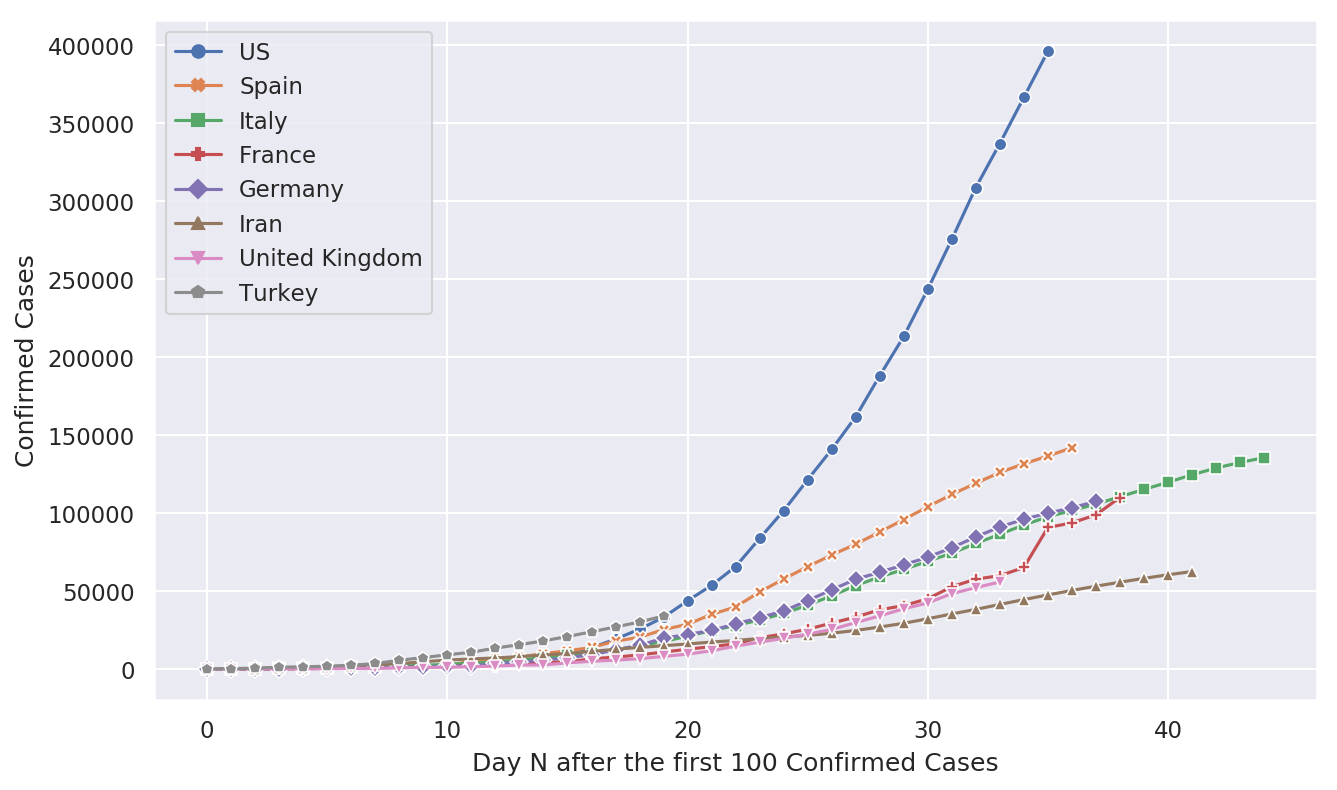

In [19]:
plot_linear(plottable(relative(confirmed_country)))

In [20]:
#plot_linear(plottable(relative(active_country)), what='Active')

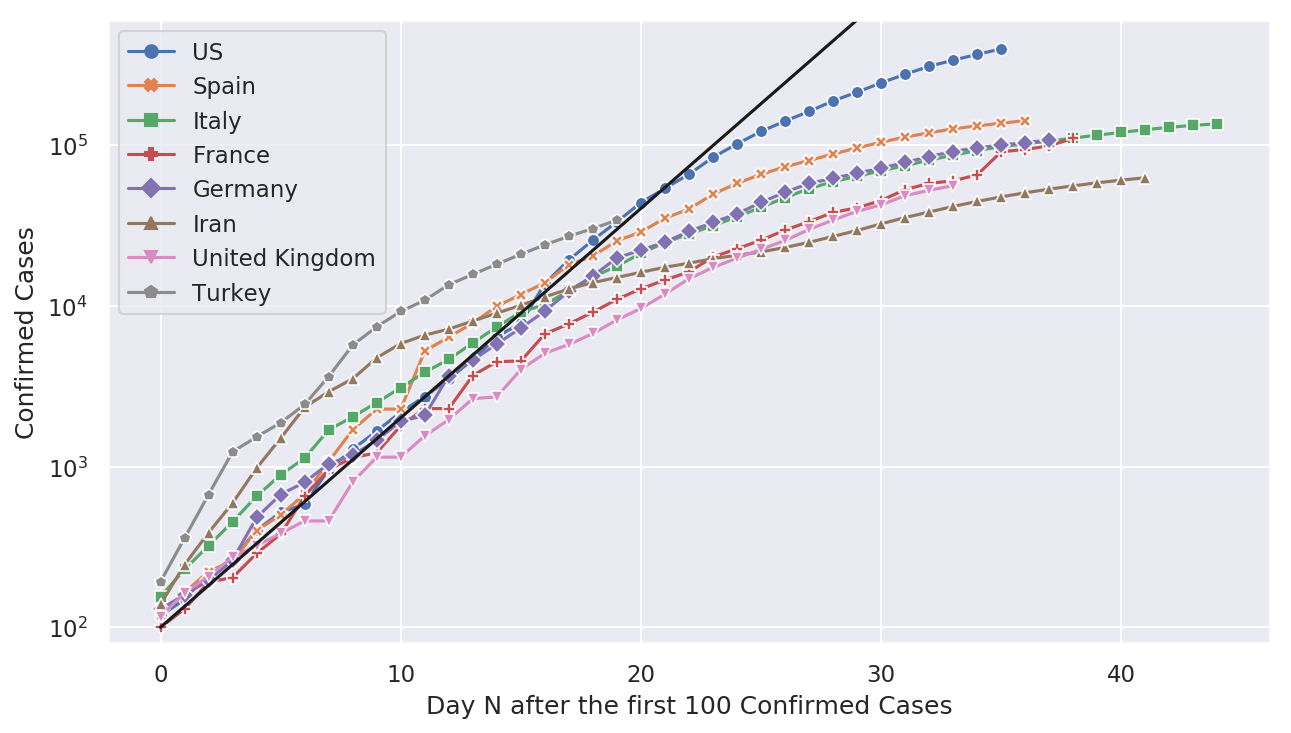

In [21]:
plot_log(plottable(relative(confirmed_country)))

In [22]:
#plot_log(plottable(relative(active_country)), what='Active')

In [23]:
#plot_linear(plottable(relative(active_country), countries=['Other']), what='Active')

In [24]:
#plot_log(plottable(relative(active_country), countries=['Other']), what='Active')

In [25]:
#plot_data = plottable(active_country, countries=['Other']).iloc[10:]
#what = 'Active'
#plot_data = plot_data.reset_index().rename(columns={"index":"day"})
#fig, ax = plt.subplots(figsize=(10,6), dpi=150)
#plot_data.plot.line(ax=ax, style='-', rot=45, xticks=plot_data.index)
#plt.legend(loc='upper left')
#offset = OFFSET
#ax.set(ylabel=('%s Cases' % what))
#ax.set_xticklabels(plot_data["day"], fontsize='x-small', horizontalalignment='right');

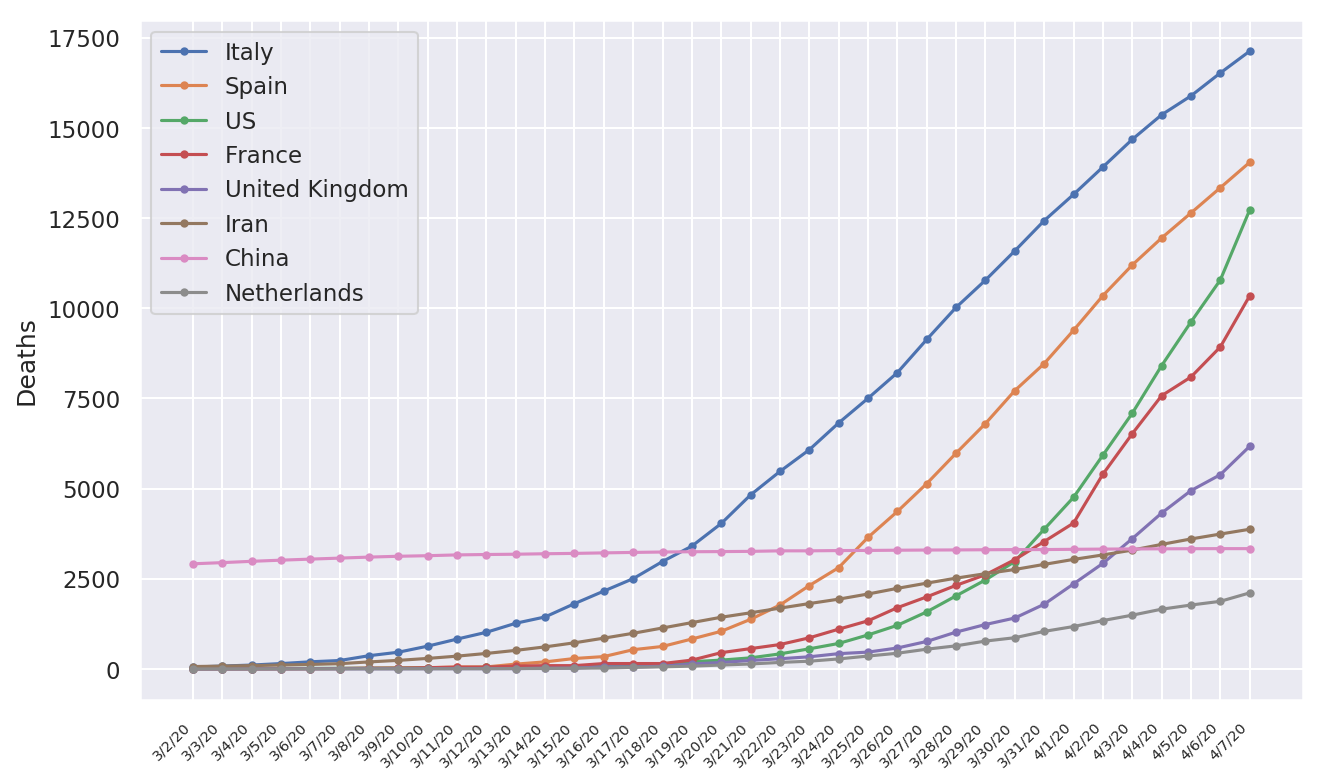

In [26]:
plot_data = plottable(deaths_country, countries=['Other']).iloc[40:]
what = 'Deaths'
plot_data = plot_data.reset_index().rename(columns={"index":"day"})
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plot_data.plot.line(ax=ax, style='.-', rot=45, xticks=plot_data.index)
plt.legend(loc='upper left')
ax.set(ylabel=('%s' % what))
ax.set_xticklabels(plot_data["day"], fontsize='x-small', horizontalalignment='right');

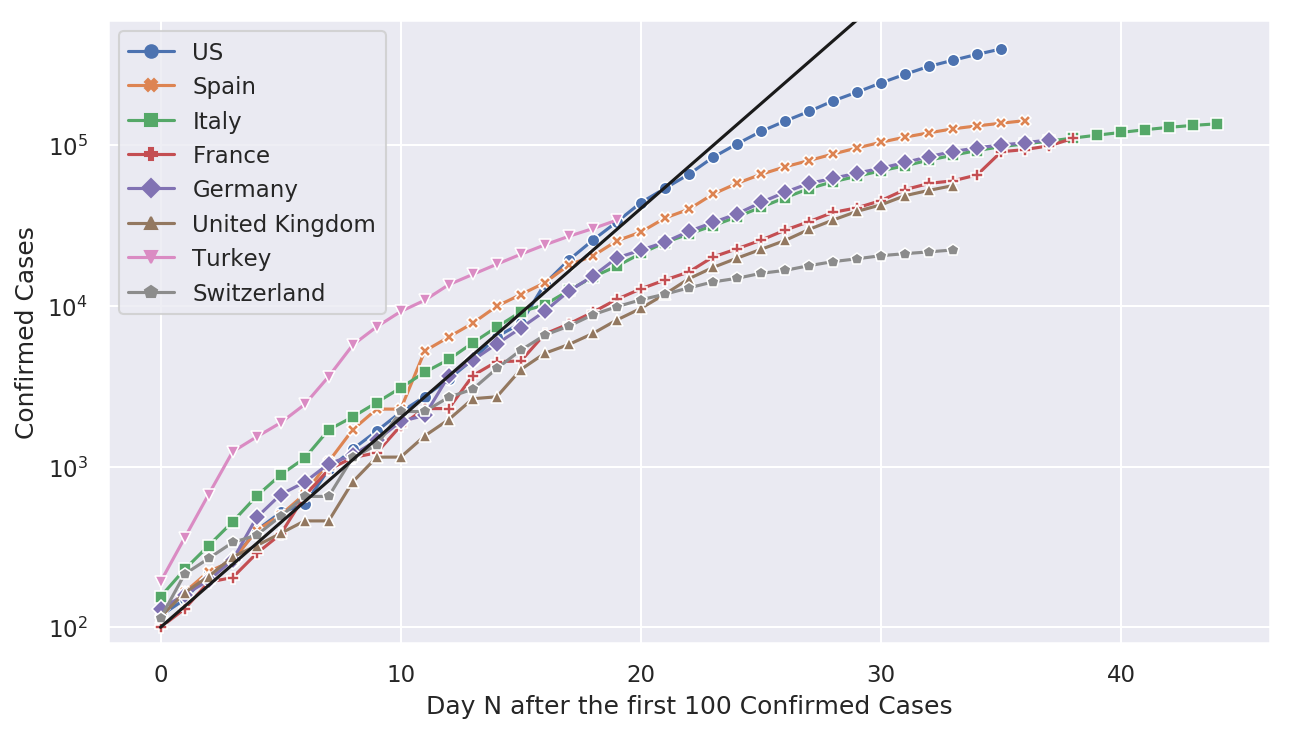

In [27]:
plot_log(plottable(relative(confirmed_country), countries=['China', 'Others', 'Cruise Ship', 'Iran', 'Korea, South']), growth_rate=0.30, offset=100)

In [28]:
#plot_log(plottable(relative(active_country), countries=['China', 'Others', 'Cruise Ship', 'Iran', 'Korea, South', 'Italy']), growth_rate=0.30, offset=100, what='Active')

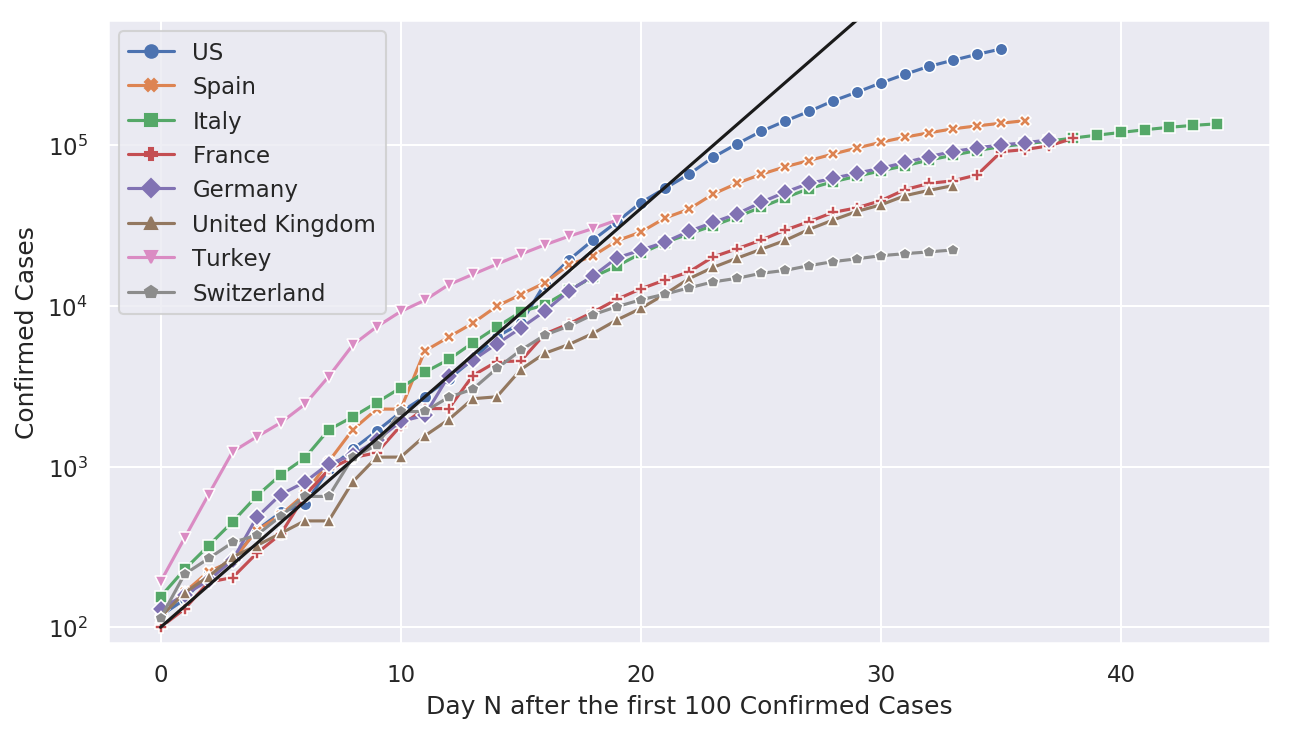

In [29]:
plot_log(plottable(relative(confirmed_country), countries=['China', 'Others', 'Cruise Ship', 'Iran', 'Korea, South']), growth_rate=0.30, offset=100)

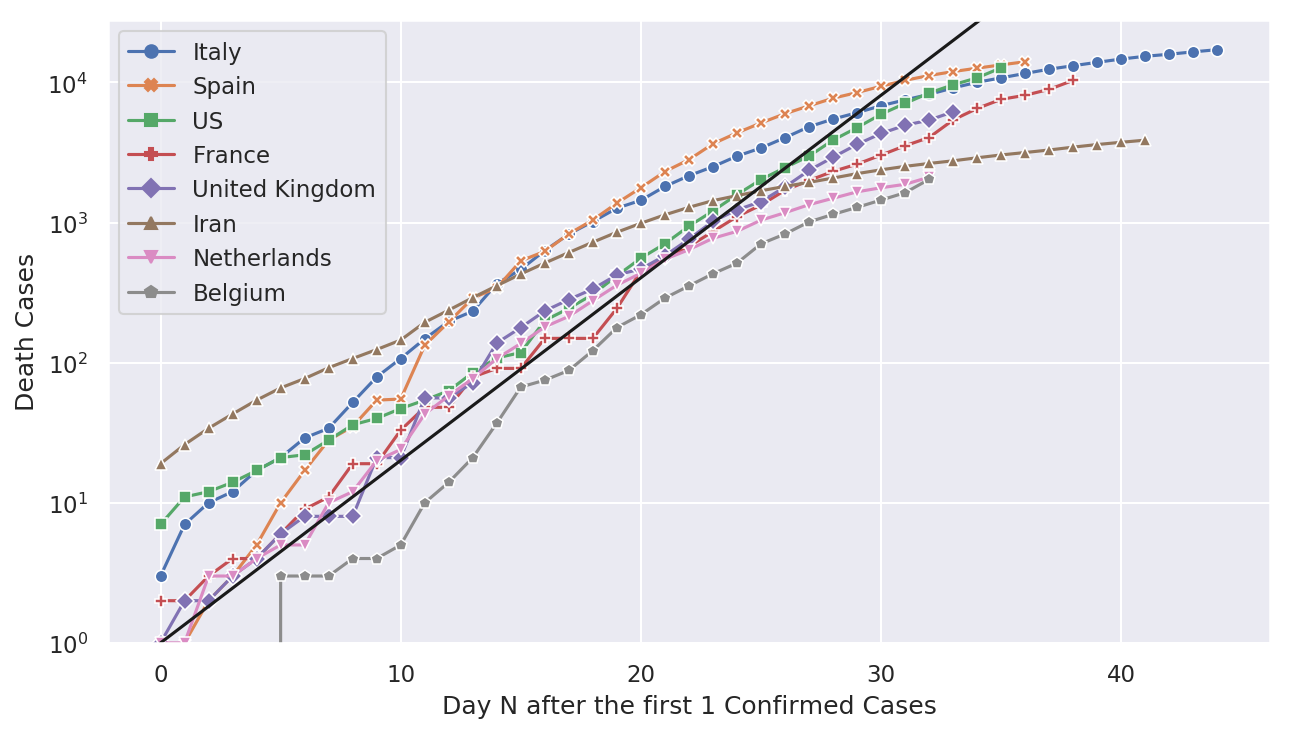

In [30]:
plot_log(plottable(relative(deaths_country)), what='Death', ymin=1, offset=1)

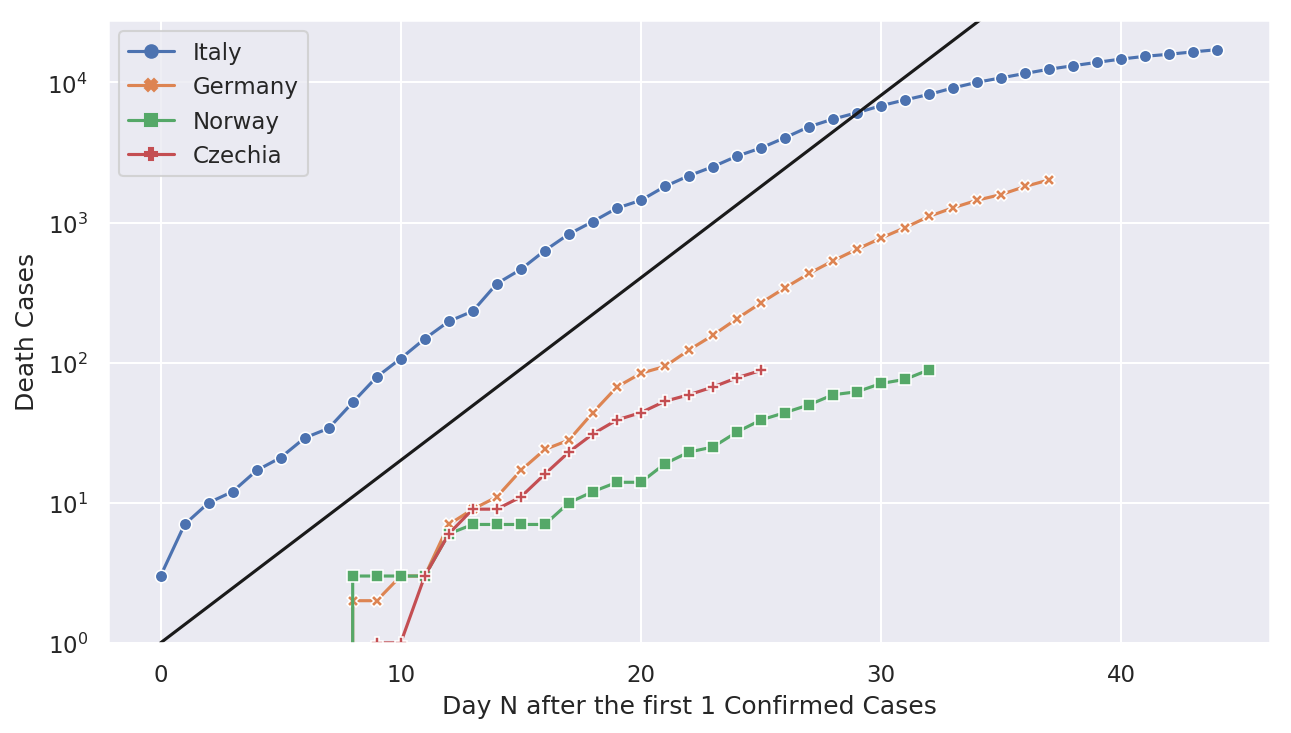

In [31]:
plot_log(plottable(relative(deaths_country), countries=['Czechia', 'Germany', 'Italy', 'Norway'], mode='include'), what='Death', ymin=1, offset=1)

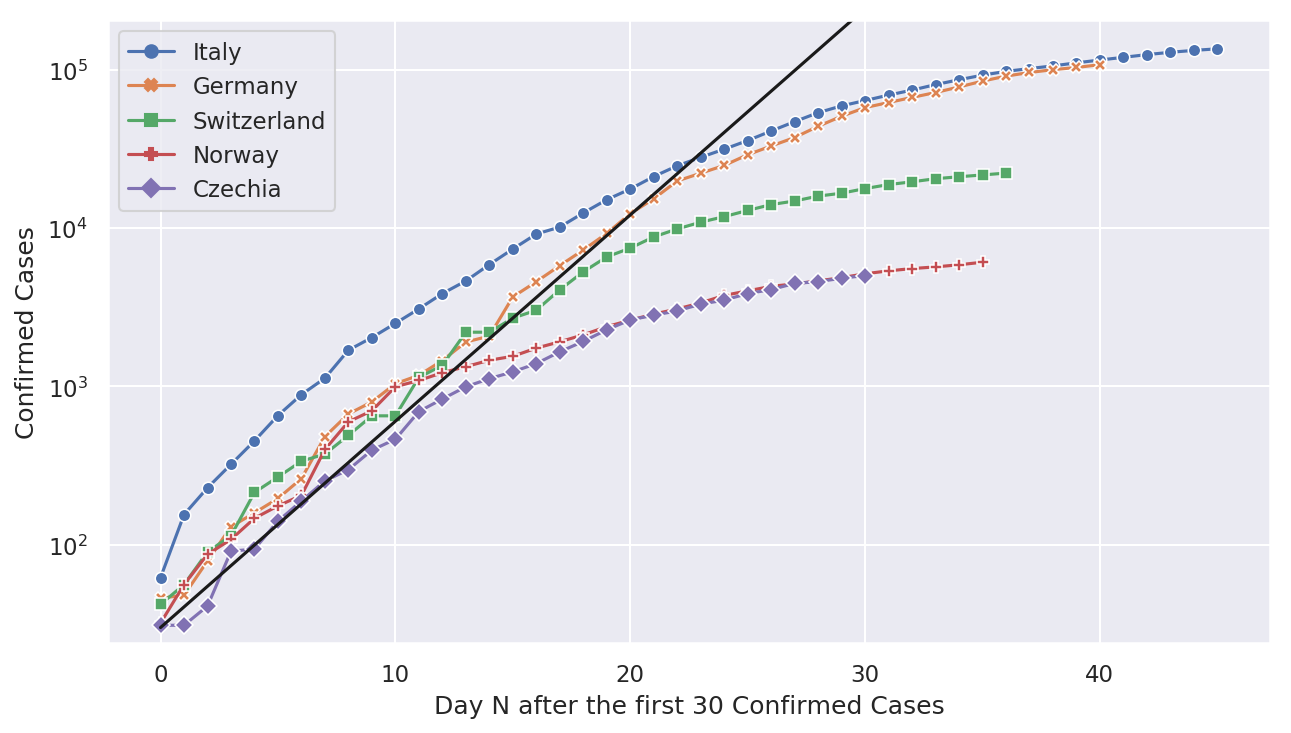

In [32]:
#plot_linear(plottable(relative(confirmed_country, offset=30), countries=['Czechia', 'Germany', 'Italy'], mode='include').head(10), offset=30)
plot_log(plottable(relative(confirmed_country, offset=30), countries=['Czechia', 'Germany', 'Italy', 'Switzerland', 'Norway'], mode='include'), growth_rate=0.30, offset=30)

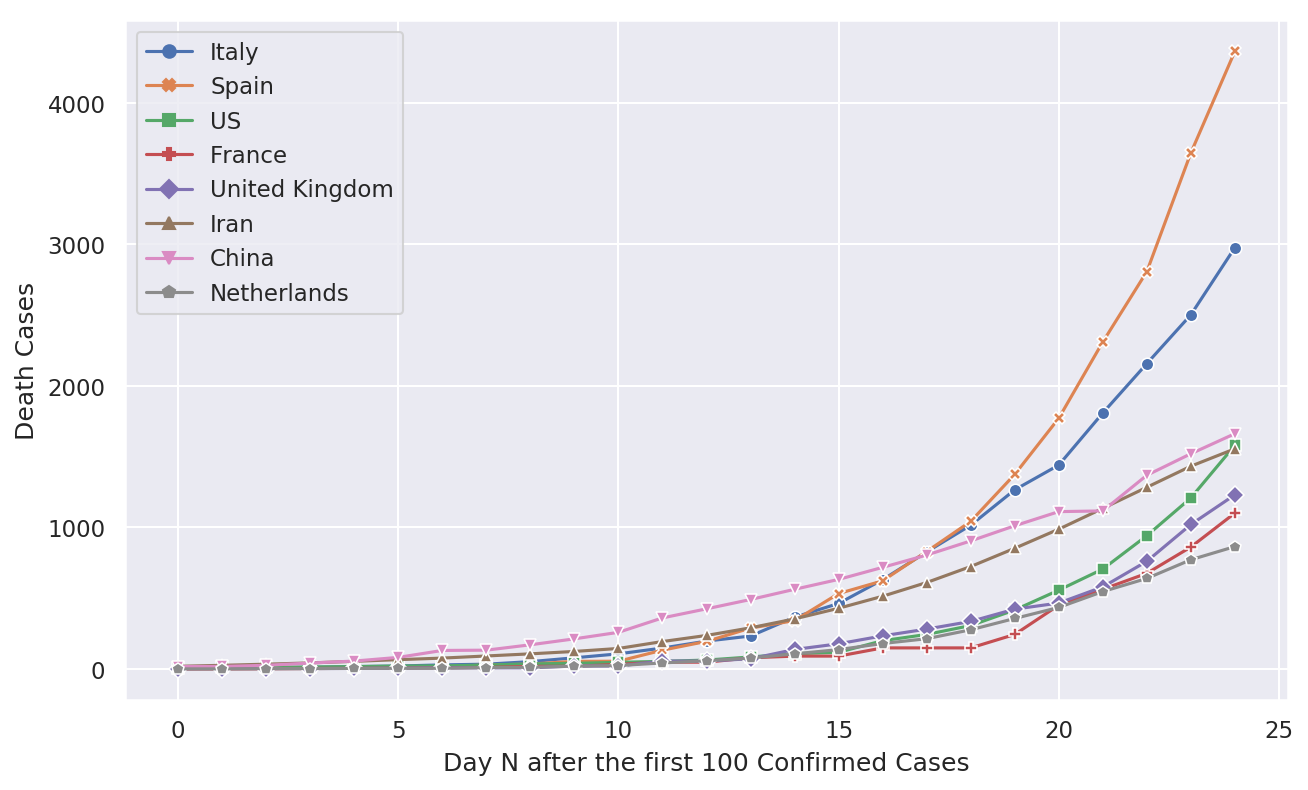

In [33]:
plot_linear(plottable(relative(deaths_country), countries=['Other']).iloc[:25], what='Death')

In [34]:
def index_for_day(data, day):
  return data[data['day'] == day].index.values[0]

In [35]:
def fit_range(plt, plot_data, column, start_date, end_date, **kwargs):
  index_start = index_for_day(plot_data, start_date)
  index_end = index_for_day(plot_data, end_date)
  fit_data = plot_data.iloc[index_start:index_end+1]
  [growth_rate, A] = np.polyfit(fit_data[column].index.values, np.log(fit_data[column].values), 1)
  x = np.arange(index_start-2, index_end+3, 1)
  y = np.exp(A)*np.exp(x*growth_rate)
  plt.plot(x, y, **kwargs)
  return growth_rate

In [36]:
def plot_dates(df=None, countries=None, start_date=None, what='Confirmed Cases', ylim_bottom=10):
  plot_data = plottable(df, countries=countries, mode='include').loc[start_date:]
  plot_data = plot_data.reset_index().rename(columns={"index":"day"})
  fig, ax = plt.subplots(figsize=(10,6), dpi=150)
  plot_data.plot.line(ax=ax, style='-', rot=45, xticks=plot_data.index, zorder=100)
  plt.legend(loc='lower right')
  ax.set(ylabel=(what))
  ax.set_xticklabels(plot_data["day"], fontsize='x-small', horizontalalignment='right');
  ax.set_yscale('log')
  ax.set_ylim(bottom=ylim_bottom)
  return (plot_data, ax)

Text(25.5,50,'8d after\nquarantine\nT_d=4.7d -> T_d=5.4d -> T_d=10.0d')

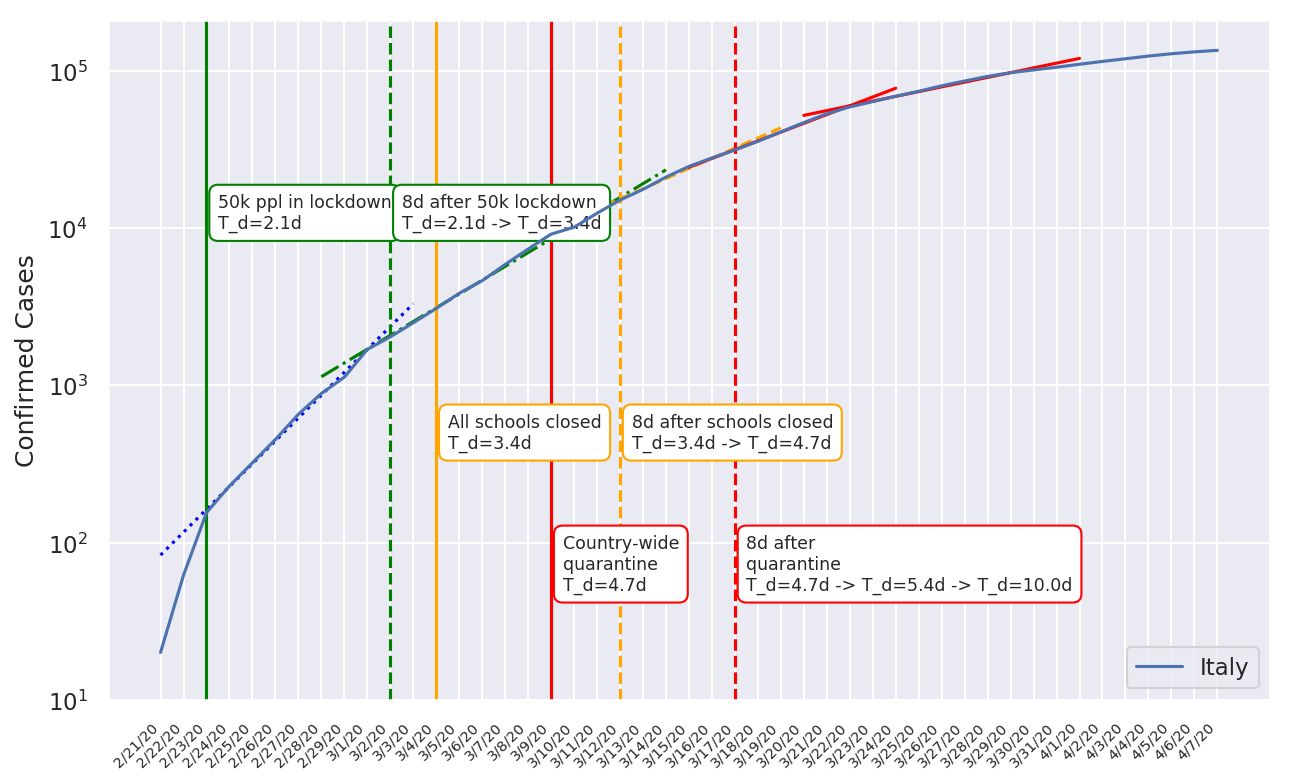

In [37]:
(plot_data, ax) = plot_dates(df=confirmed_country, countries=['Italy'], start_date='2/21/20')

# Feb 23 = 50k ppl in Quarantine
lockdown_rate = fit_range(plt, plot_data, 'Italy', start_date='2/23/20', end_date='3/1/20', linestyle=':', color='blue')

# Mar 4 = Schools closed
school_close_rate = fit_range(plt, plot_data, 'Italy', start_date='3/1/20', end_date='3/12/20', linestyle='-.', color='green')

# Mar 4 = Schools closed
pre_quarantine_rate = fit_range(plt, plot_data, 'Italy', start_date='3/12/20', end_date='3/17/20', linestyle='--', color='orange')

# Mar 4 = Schools closed
quarantine_rate = fit_range(plt, plot_data, 'Italy', start_date='3/17/20', end_date='3/22/20', linestyle='solid', color='red')

recent_rate = fit_range(plt, plot_data, 'Italy', start_date='3/22/20', end_date='3/30/20', linestyle='solid', color='red')

index=index_for_day(plot_data, '2/23/20')
ax.axvline(x=index, linestyle='solid', color='green')
ax.text(x=index+0.5, y=1*10**4, s='50k ppl in lockdown\nT_d=%.1fd' % (math.log(2)/lockdown_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
ax.axvline(x=index+8, linestyle='dashed', color='green')
ax.text(x=index+0.5+8, y=1*10**4, s='8d after 50k lockdown\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/lockdown_rate), (math.log(2)/school_close_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))

index=index_for_day(plot_data, '3/4/20')
ax.axvline(x=index, linestyle='solid', color='orange')
ax.text(x=index+0.5, y=4*10**2, s='All schools closed\nT_d=%.1fd' % (math.log(2)/school_close_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))
ax.axvline(x=index+8, linestyle='dashed', color='orange')
ax.text(x=index+0.5+8, y=4*10**2, s='8d after schools closed\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/school_close_rate), (math.log(2)/pre_quarantine_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))

index=index_for_day(plot_data, '3/9/20')
ax.axvline(x=index, linestyle='solid', color='red')
ax.text(x=index+0.5, y=5*10**1, s='Country-wide\nquarantine\nT_d=%.1fd' % (math.log(2)/pre_quarantine_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
ax.axvline(x=index+8, linestyle='dashed', color='red')
ax.text(x=index+0.5+8, y=5*10**1, s='8d after\nquarantine\nT_d=%.1fd -> T_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/pre_quarantine_rate), (math.log(2)/quarantine_rate), (math.log(2)/recent_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

0.040584890119203146

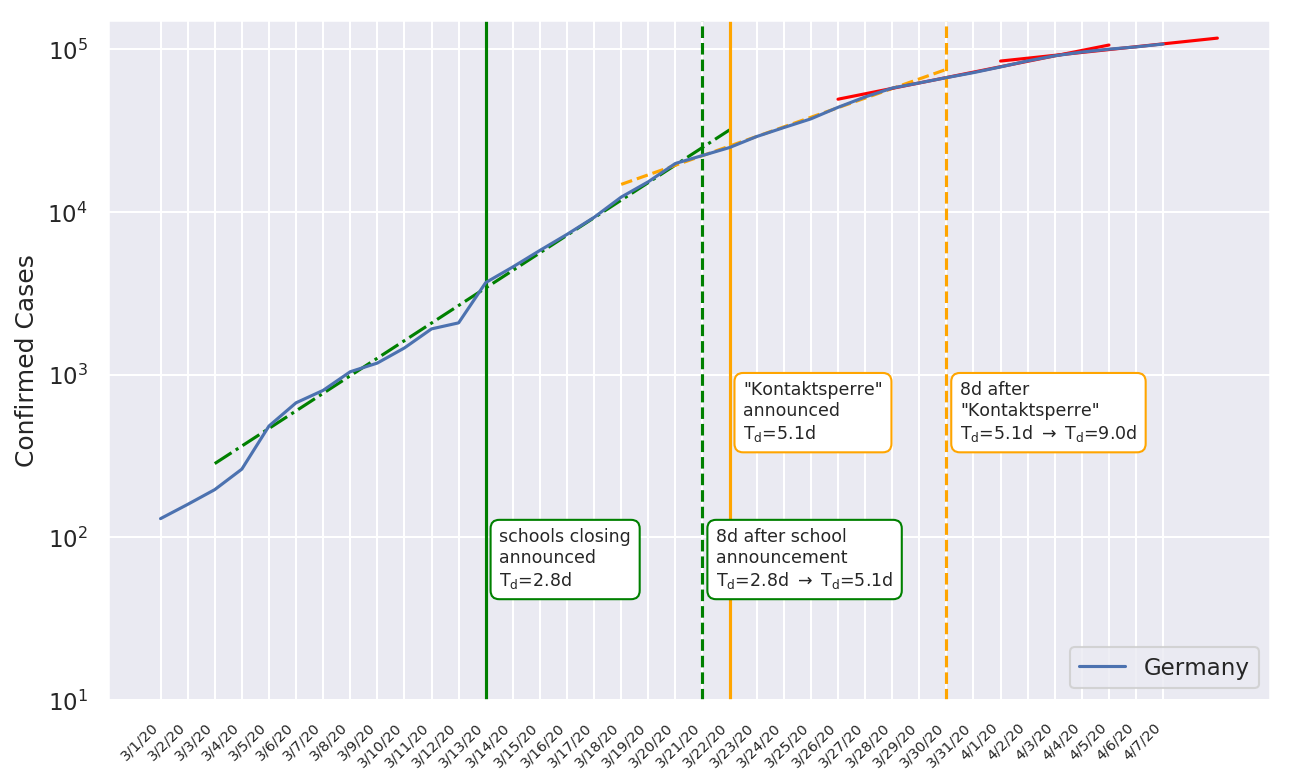

In [43]:
(plot_data, ax) = plot_dates(df=confirmed_country, countries=['Germany'], start_date='3/1/20')

# Mar 13 = Schools closed announced
# Mar 17 = Schools closed enforced
initial_rate = fit_range(plt, plot_data, 'Germany', start_date='3/5/20', end_date='3/20/20', linestyle='-.', color='green')

# Mar 4 = Schools closed
school_close_rate = fit_range(plt, plot_data, 'Germany', start_date='3/20/20', end_date='3/28/20', linestyle='--', color='orange')

# Mar 22 = "Kontaktsperre"
quarantine_rate = fit_range(plt, plot_data, 'Germany', start_date='3/28/20', end_date='4/3/20', linestyle='solid', color='red')

index=index_for_day(plot_data, '3/13/20')
ax.axvline(x=index, linestyle='solid', color='green')
ax.text(x=index+0.5, y=5*10**1, s='schools closing\nannounced\n$\mathregular{T_d}$=%.1fd' % (math.log(2)/initial_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
ax.axvline(x=index+8, linestyle='dashed', color='green')
ax.text(x=index+0.5+8, y=5*10**1, s='8d after school\nannouncement\n$\mathregular{T_d}$=%.1fd $\\rightarrow$ $\mathregular{T_d}$=%.1fd' % ((math.log(2)/initial_rate), (math.log(2)/school_close_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))

index=index_for_day(plot_data, '3/22/20')
ax.axvline(x=index, linestyle='solid', color='orange')
ax.text(x=index+0.5, y=4*10**2, s='"Kontaktsperre"\nannounced\n$\mathregular{T_d}$=%.1fd' % (math.log(2)/school_close_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))
ax.axvline(x=index+8, linestyle='dashed', color='orange')
ax.text(x=index+0.5+8, y=4*10**2, s='8d after\n"Kontaktsperre"\n$\mathregular{T_d}$=%.1fd $\\rightarrow$ $\mathregular{T_d}$=%.1fd' % ((math.log(2)/school_close_rate), (math.log(2)/quarantine_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))

latest_rate = fit_range(plt, plot_data, 'Germany', start_date='4/3/20', end_date='4/7/20', linestyle='solid', color='red')
latest_rate

#ax.axvline(x=17, linestyle='solid', color='red')
#ax.text(x=17.5, y=5*10**1, s='Country-wide quarantine\nT_d=%.1fd' % (math.log(2)/pre_quarantine_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
#ax.axvline(x=17+8, linestyle='dashed', color='red')
#ax.text(x=17.5+8, y=5*10**1, s='8d after quarantine\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/pre_quarantine_rate), (math.log(2)/quarantine_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

Text(29.5,50,'T_d=2.6d -> T_d=3.7d')

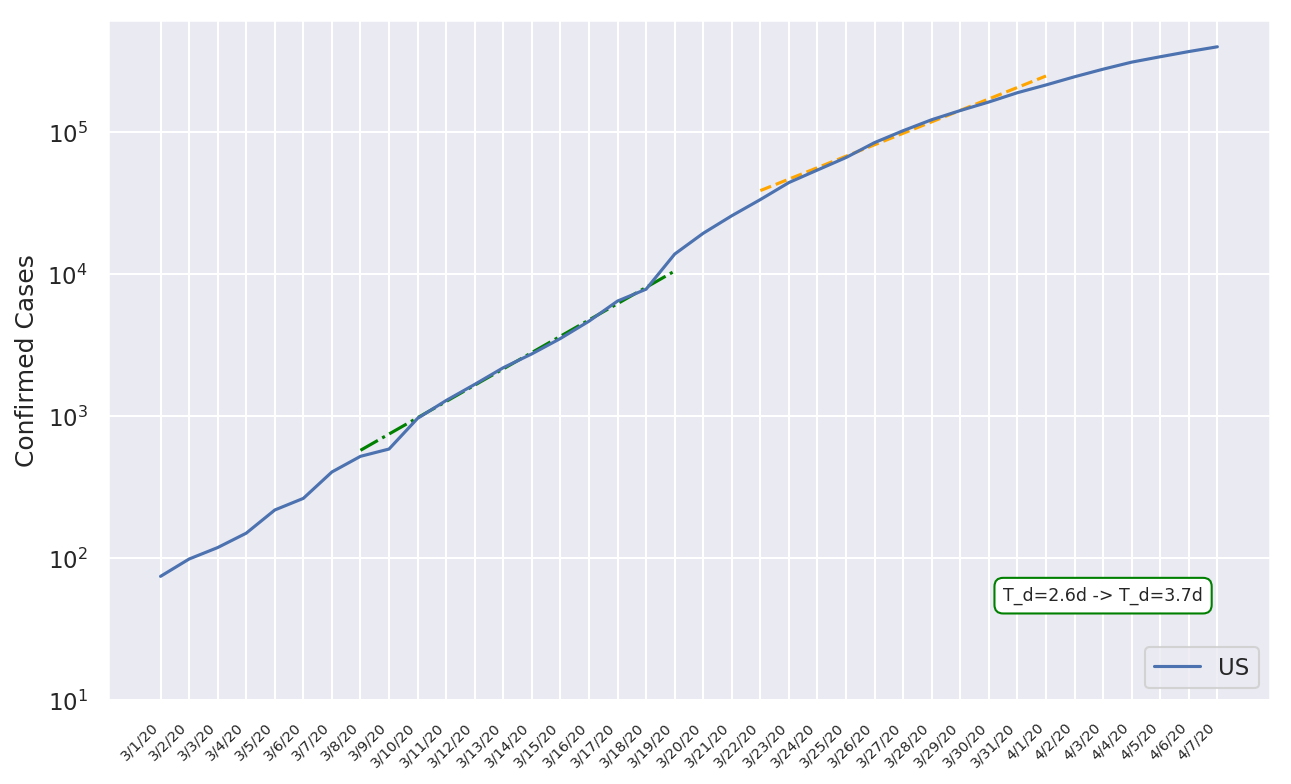

In [39]:
(plot_data, ax) = plot_dates(df=confirmed_country, countries=['US'], start_date='3/1/20')

initial_rate = fit_range(plt, plot_data, 'US', start_date='3/10/20', end_date='3/17/20', linestyle='-.', color='green')
second_rate = fit_range(plt, plot_data, 'US', start_date='3/24/20', end_date='3/30/20', linestyle='--', color='orange')

ax.text(x=21.5+8, y=5*10**1, s='T_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/initial_rate), (math.log(2)/second_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))

Text(29.5,400,'8d after\n"Kontaktsperre"')

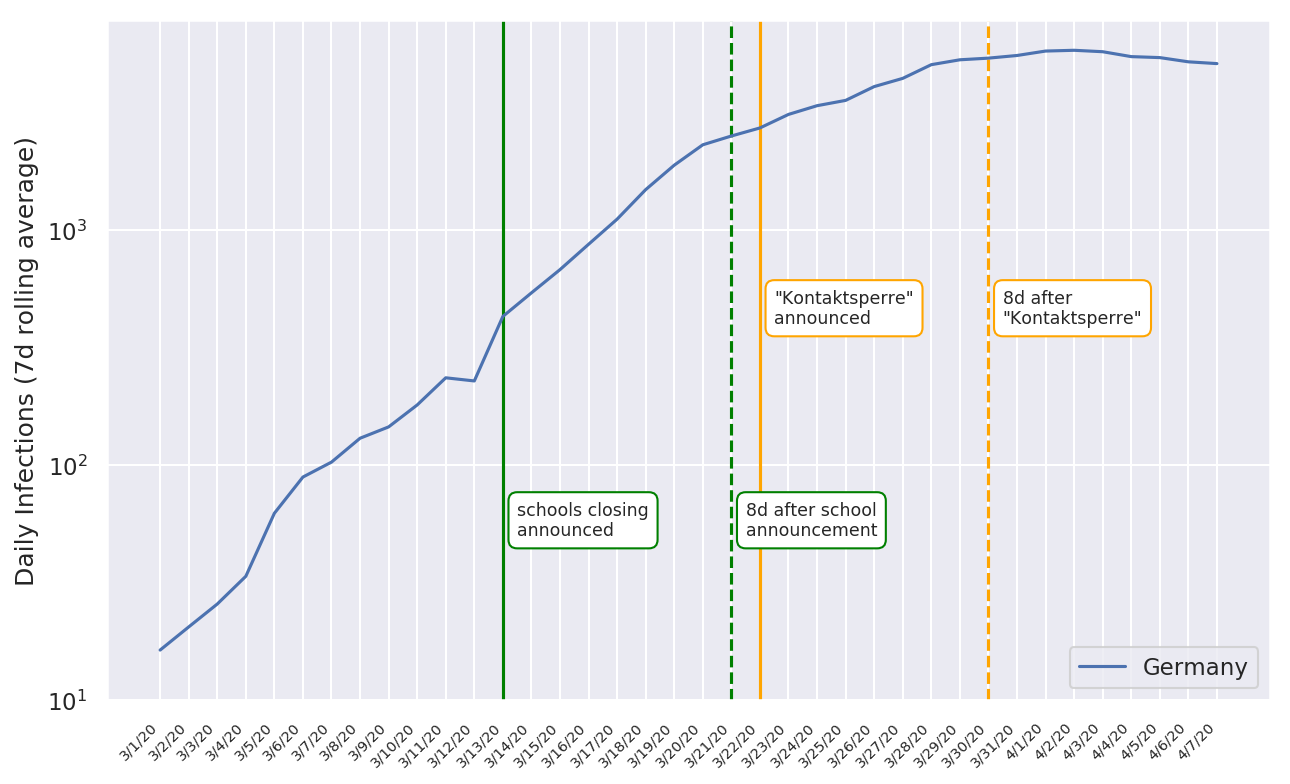

In [40]:
(plot_data, ax) = plot_dates(df=infections_country.rolling(7, axis=1).mean(), countries=['Germany'], start_date='3/1/20', what='Daily Infections (7d rolling average)')

index=index_for_day(plot_data, '3/13/20')
ax.axvline(x=index, linestyle='solid', color='green')
ax.text(x=index+0.5, y=5*10**1, s='schools closing\nannounced', fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
ax.axvline(x=index+8, linestyle='dashed', color='green')
ax.text(x=index+0.5+8, y=5*10**1, s='8d after school\nannouncement', fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))

index=index_for_day(plot_data, '3/22/20')
ax.axvline(x=index, linestyle='solid', color='orange')
ax.text(x=index+0.5, y=4*10**2, s='"Kontaktsperre"\nannounced', fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))
ax.axvline(x=index+8, linestyle='dashed', color='orange')
ax.text(x=index+0.5+8, y=4*10**2, s='8d after\n"Kontaktsperre"', fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))

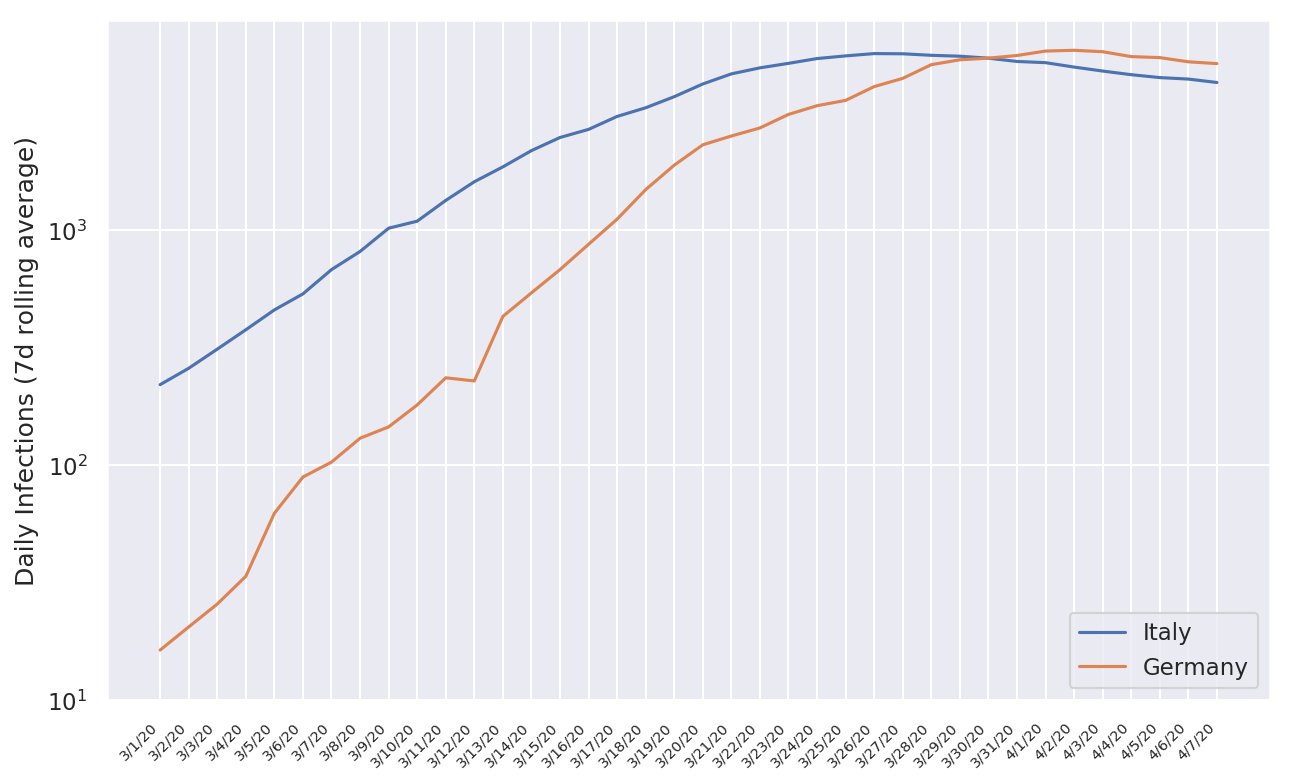

In [41]:
(plot_data, ax) = plot_dates(df=infections_country.rolling(7, axis=1).mean(), countries=['Germany', 'Italy'], start_date='3/1/20', what='Daily Infections (7d rolling average)')

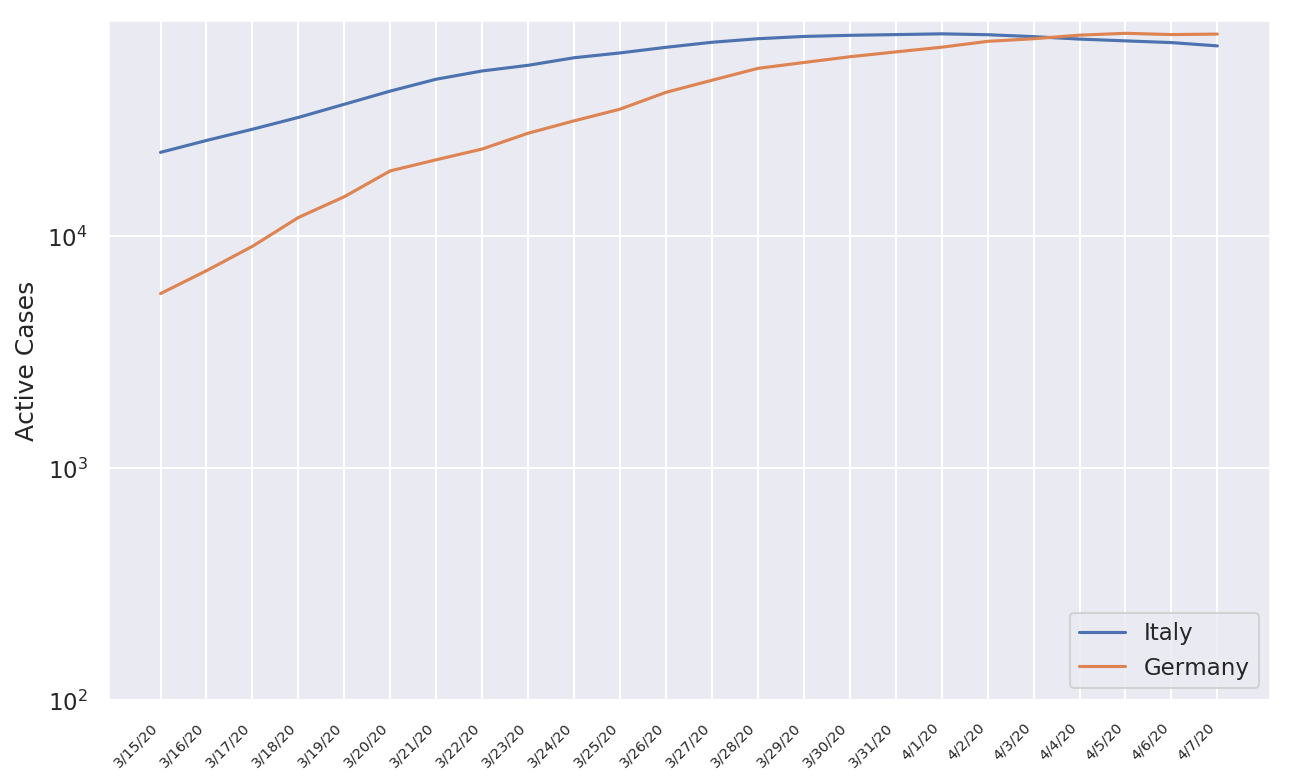

In [42]:
(plot_data, ax) = plot_dates(df=active_country, countries=['Germany', 'Italy'], start_date='3/15/20', what='Active Cases', ylim_bottom=100)